# 설치

In [1]:
# 이 코드는 처음 실행시 한 번만 해도 됩니다.


# # colab에서 패키지 영구적으로 사용하기
# # 구글드라이브에 패키지를 저장한다.

# import os, sys
# from google.colab import drive
# drive.mount('/content/drive')

# # /content/notebooks 에 my_env 폴더 생성
# my_path = '/content/notebooks'
# os.chdir('/content/notebooks')
# os.getcwd() 
# os.makedirs('./my_env')

# # Colab Notebooks 안에 my_env 폴더에 패키지 저장
# os.symlink('/content/drive/My Drive/Colab Notebooks/my_env', my_path)
# sys.path.insert(0, my_path)

# # 구글드라이브의 - Colab Notebooks > my_env 폴더에 패키지를 저장하는 코드
# # !pip install 설치할 패키지 --target=$my_path jdc


# # -------------------------------- #
# # Konlpy 설치

# !pip install --target=$my_path konlpy 

# 생성 파일명
# dictionary

# # open-korean-text-2.1.0.jar: okt 패키지  
# # dictionary 내부에 압축을 해제

# os.chdir('/content/notebooks/konlpy/java')
# os.getcwd() 
# os.makedirs('./dictionary')

# # 설치위치 파일명 변경

# os.chdir('/content/notebooks/konlpy/java/dictionary')
# !jar xvf ../open-korean-text-2.1.0.jar

# # pyvis 설치
# !pip install --target=$my_path pyvis 

# # --------------------------- #

# # 명사는 noun, substantives 

# # 조사는 josa 

# # 형용사는 adjective

# # 동사는 verb 

# # 부사는 adverb 

# # 접속사, 감탄사는 auxiliary

# # 오타는 typos 


In [52]:
# 코랩 런타임 초기화시 아래 코드 실행
# 이 코드는 패키지를 다시 설치하지 않도록 패키지를 리로드해줍니다.

import os, sys
from google.colab import drive
my_path = '/content/notebooks'
# os.symlink('/content/drive/My Drive/Colab Notebooks/my_env', my_path)
sys.path.insert(0, my_path)

In [54]:
# 코랩에서 한글 폰트를 사용하기 위한 설치과정
# 설치 후 런타임 초기화 할 것

## 이유는 모르나 (코랩에서 패키지 영구적으로 사용하기)가 적용이 안된다 - 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

E: Command line option --target=/content/notebooks is not understood in combination with the other options
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [4]:
# # # 사전 업데이트

# %cd /content/notebooks/konlpy/java/dictionary
# !jar cvf open-korean-text-2.1.0.jar *
# !mv open-korean-text-2.1.0.jar ../

# 리뷰 데이터 불러오기



In [55]:
# 엑셀 파일 이름 한 번에 꺼내기
# lst_excel 에 저장

%cd /content/drive/MyDrive/crawling_data/ZeroSugar_review_10000


import os

lst_excel = []
dir_path = "/content/drive/MyDrive/crawling_data/ZeroSugar_review_10000"

for (root, directories, files) in os.walk(dir_path):
    for d in directories:
        d_path = os.path.join(root, d)
        print(d_path)
    for file in files:
        file_path = os.path.join(root, file)
        if 'review' in file :
          break
        else :
          # print(file)
          lst_excel.append(file)
# df = pd.read_excel('OneamSparkling_652_Danawa_crawling.xlsx')
# df.head()
# 엑셀 파일 단번에 dataframe으로 가져오기

import pandas as pd

for exc in lst_excel :
  file_name = exc[:exc.find('_')]
  globals()[file_name] = pd.read_excel(exc)
  print(f'{file_name} excel_pass')
  print('-'*60)



/content/drive/MyDrive/crawling_data/ZeroSugar_review_10000
/content/drive/MyDrive/crawling_data/ZeroSugar_review_10000/ipynb
Minemine excel_pass
------------------------------------------------------------
Victoria excel_pass
------------------------------------------------------------
WelchsZ excel_pass
------------------------------------------------------------
ChilsungCiderZ excel_pass
------------------------------------------------------------
CocacolaZ excel_pass
------------------------------------------------------------
Trevi excel_pass
------------------------------------------------------------
BurrZcider excel_pass
------------------------------------------------------------
NobrandSparkling excel_pass
------------------------------------------------------------
SpriteZ excel_pass
------------------------------------------------------------
PepsiColaZ excel_pass
------------------------------------------------------------
NarangdCider excel_pass
--------------------------

In [ ]:
# 기본 사용 dataframe에 값 선언
# 알맞은 데이터가 맞는지 확인

df = PepsiColaZ.copy()
df.info()

for i in range(0, 10):
  print(str(i), df['review'][i])

# 전처리

In [11]:
# 문자 정돈

import re

def cleaned_text(text): 
  hangul = re.compile('[^가-힇a-zA-Z0-9]')
  result = hangul.sub(' ', text)

  # 띄어쓰기 명사 추가

  # pepsi_01 = re.compile('제로 펩시')
  # result = pepsi_01.sub('펩시제로', text)

  # pepsi_02 = re.compile('펩시 제로')
  # result = pepsi_02.sub('펩시제로', text)

  return result

df['review'] = df['review'].apply(lambda x: cleaned_text(x))
reviews = df['review']

In [ ]:
# okt 

# morphs() : 텍스트를 형태소 단위로 나눈다.
# 옵션 : norm, stem. norm은 normalize의 약자로 문장의 정규화 여부를 정하는 옵션이다. 
# stem은 각 단어에서 어간을 추출할지 정하는 옵션이다. 기본값은 둘 다 False.
# nouns() : 텍스트에서 명사만 추출한다.
# phrases() : 텍스트에서 어절을 추출한다.
# pos() : 텍스트를 형태소 단위로 나눈 뒤, 형태소와 품사 정보를 리스트화한 결과를 반환한다.
# pos() 함수도 norm, stem 옵션이 있다.

# okt 연습 실행
# 패키지를 못찾을 경우 경로 설정을 다시해보자
%cd /content/drive/MyDrive/Colab Notebooks/my_env

from konlpy.tag import Okt
# norm = True
# norm은 정규화 여부 확인이다. -> 오타를 검증해줌


okt = Okt()
okt.pos('닭가슴살 라임맛 좋고 라임향 힘쌔고 제로슈거 힘듬 배송상태 특유 콜라향 탄산음료 제로칼로리음료' 
        , norm = True , stem = True)

In [ ]:
# NN_words

from konlpy.tag import Okt
okt = Okt()

NN_words = []

for review in reviews:
  okt_pos = okt.pos(review , norm = True)

  for word, pos in okt_pos:
    if 'Noun' in pos :
      NN_words.append(word)
    elif 'Adjective' in pos :
      NN_words.append(word)

# 출력
# NN_words

# 불용어 사전

def bullword_cleaned_text(text): 
  hangul = re.compile('[^가-힇a-zA-Z0-9]')
  result = hangul.sub('', text)
  return result

with open('/content/drive/MyDrive/crawling_data/one_word.txt' , 'r' , encoding='utf-8') as f :
  file_data = f.readlines()

one_word = []
for fi in file_data : 
  one_word.append(bullword_cleaned_text(fi))

customized_stopwords = one_word

unique_NN_words = set(NN_words)

for word in unique_NN_words :
  if word in customized_stopwords:
    while word in NN_words: 
      NN_words.remove(word)

# 출력
# NN_words

# Sematic Network 형성

In [23]:
# 빈도 파악

from collections import Counter

c = Counter(NN_words)
print(c.most_common(50))

list_of_words = []

for word, count in c.most_common(50):
  list_of_words.append(word)

# 노드 생성

import networkx as nx

G = nx.Graph()
G.add_nodes_from(list_of_words)

# print(G.nodes())
# print(G.edges())

# edge 생성

import itertools
# weight 초기화가 없을 경우 재실행시 계속해서 weight 크기가 커진다.
weight = 0
for review in reviews :

  selected_words = []
  NN_words = []
  # norm = True 정규화 수정
  okt_pos = okt.pos(review , norm = True)

  for word, pos in okt_pos :
    if 'Noun' in pos: # 명사만 가져옴
      NN_words.append(word)
    elif 'Adjective' in pos :
      NN_words.append(word)

  for word in NN_words :
    if word in list_of_words:
      selected_words.append(word)

  selected_words = set(selected_words)

  for pair in list(itertools.combinations(list(selected_words), 2)):
    if pair in G.edges():
      weight = G[pair[0]][pair[1]]['weight']
      weight += 1
      G[pair[0]][pair[1]]['weight'] = weight    
    else:         
      G.add_edge(pair[0], pair[1], weight=1 )
            
 # 생성된 edge 확인해보기
print(nx.get_edge_attributes(G, 'weight'))


[('배송', 2968), ('좋아요', 2660), ('구매', 1920), ('빠르다', 1865), ('제로', 1494), ('맛있어요', 1181), ('펩시제로', 1155), ('맛', 1129), ('가격', 1099), ('저렴하다', 1066), ('콜라', 1054), ('펩시', 1025), ('포장', 705), ('라임향', 688), ('제품', 670), ('제로콜라', 670), ('캔', 589), ('만족합니다', 527), ('탄산', 417), ('음료', 382), ('박스', 379), ('최고', 367), ('마음', 339), ('재구매', 252), ('코카콜라', 243), ('좋다', 220), ('펩시콜라', 176), ('도착', 176), ('추천', 172), ('칼로리', 162), ('할인', 159), ('가성비', 157), ('쿠폰', 148), ('안전하게', 137), ('냉장고', 135), ('요즘', 132), ('부담', 130), ('계속', 127), ('집', 124), ('파손', 121), ('처음', 119), ('만족', 119), ('생각', 114), ('스마일', 110), ('유통기한', 105), ('맛있네요', 105), ('다이어트', 104), ('시원하게', 104), ('맛있어서', 103), ('걱정', 102)]


# 네트워크 시각화

In [29]:
# dataframe of nodes
import numpy as np

def nodes_to_df() :
  main_data = nx.get_edge_attributes(G, 'weight')
  words = G.nodes()

  ary = np.zeros((len(words),len(words)))
  df_ary = pd.DataFrame(ary)
  df_ary = df_ary.astype(int)
  df_ary

  word_dict = {t:i for i ,t in enumerate(words)}

  for pr in main_data.keys() :
      for x in word_dict.keys() :
          for y in word_dict.keys() :
              if pr[0] == x and pr[1] == y :
                  df_ary[word_dict[y]][word_dict[x]] = main_data[(x , y)]

  df_ary.columns = words
  df_ary.index = words
  df_ary.style.background_gradient(cmap ='coolwarm')

  return df_ary 

In [ ]:
# 노드 빈도 수 df

lst_tr = []
lst_td = []
for tr , td in c.most_common(50) :
  lst_tr.append(tr)
  lst_td.append(td)

text_cnt_df = pd.DataFrame(index = lst_tr  , data=lst_td , columns=['cnt'])
# text_cnt_df

In [ ]:
# 엑셀로 텍스트 네트워크 input dataframe 확인해보기
# nodes_to_df().to_excel('/content/drive/MyDrive/crawling_data/nodes_to_df.xlsx' , index = False)

# 노드 엣지 속성 확인
# G.nodes()
# G.edges()
# G.degree()

In [ ]:
# 각 리스트의 인덱스값은 G.degree()의 인덱스값과 같습니다.
# 참고 : pd.DataFrame(G.degree())

# 노드에 연결된 선의 수가 49개 이상이면/이하이면 구슬의 색상이 아래와 같다.
color_map = []
for node in G:
    if G.degree(node) >= 49:
        color_map.append('pink') 
    else: 
        color_map.append('skyblue')   

# 노드에 연결된 선의 수가 49개 이상이면/이하이면 선의 색상이 아래와 같다.
color_edge = []
for node in G:
    if G.degree(node) >= 49:   
        color_edge.append('grey') 
    else: 
        color_edge.append('blue')   

# 노드에 연결된 선의 수가 49개 이상이면/이하이면 선의 굵기가 아래와 같다.        
color_width = []
for te in range(50):
  if te == 1:
    color_width.append(1)
  else :
    color_width.append(0)


# 특정 기준에 따라 노드 수 세어보기
# color_edge.count('grey')
# color_map.count('pink')

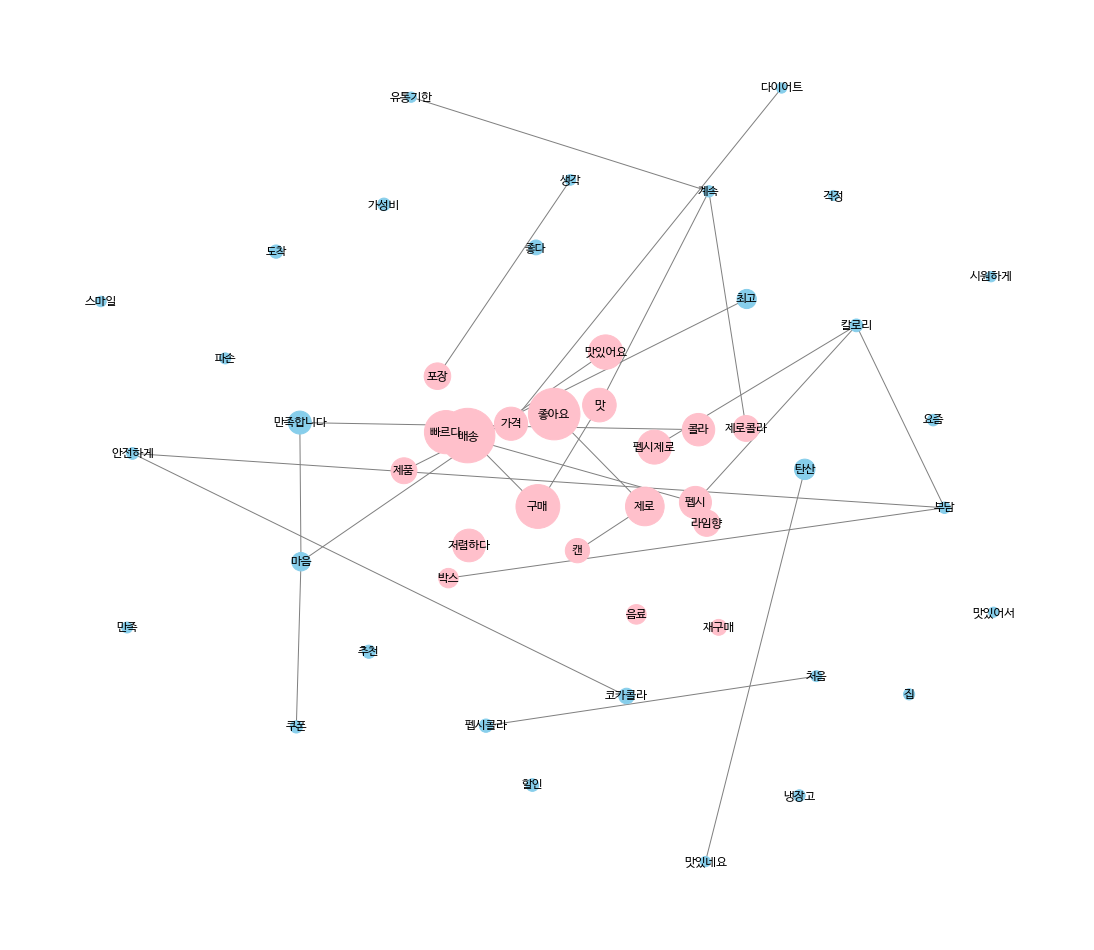

In [45]:
# 텍스트 네트워크 시각화

import networkx as nx
import matplotlib.pyplot as plt

data = nodes_to_df()

plt.rc('font', family='NanumBarunGothic')
G = nx.from_pandas_adjacency(data)
plt.figure(figsize=(15,13))
# 노드 크기 : text_cnt_df.cnt.tolist()
nx.spring_layout(G)
nx.kamada_kawai_layout(G)
nx.shell_layout(G)
nx.circular_layout(G)
nx.fruchterman_reingold_layout(G)
nx.draw(G, with_labels = True , node_color=color_map , font_family='NanumBarunGothic' 
        , node_size = (text_cnt_df.cnt*1).tolist() , edge_color = color_edge , width = color_width) 

# 한 방 코드

In [ ]:
# 코랩 런타임 초기화시 아래 코드 실행
# 이 코드는 패키지를 다시 설치하지 않도록 패키지를 리로드해줍니다.

import os, sys
from google.colab import drive
my_path = '/content/notebooks'
# os.symlink('/content/drive/My Drive/Colab Notebooks/my_env', my_path)
sys.path.insert(0, my_path)
# 코랩에서 한글 폰트를 사용하기 위한 설치과정
# 설치 후 런타임 초기화 할 것

## 이유는 모르나 (코랩에서 패키지 영구적으로 사용하기)가 적용이 안된다 - 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB
0 병원에 입원했는데 편의저에서 콜라 사먹다가  한캔에 1600원에 매일 2캔씩 먹는데 도저히 감당  안되어서 주문했습니다. 진작 시킬걸...끄응 꾸준히 구매해서 마시고 있는 제로 콜라~  만년 다이어터에게는 단비같은 칼로리입니다~ 콜라는 무조건 코카콜라 오리지널이지~라는  강박에 빠져있었던적이 있었어요~ 코카콜라 제로는 진정한 콜라가 아니다.... 얼음 탄 콜라다...물 탄 콜라다... 생각했었던 적이 있었습니다~ 몇년전 다이어트를 시작으로 입에 달고 살던  콜라부터 바꾸게 되면서 오리지널이랑 맛이  비슷하다고 최면을 걸어 익숙해져서 지금은 없으면 안되는 소중한 아이가 되었습니다~  처음엔 적응하기까지 많이 힘들었어요~ㅎ 전면에 당당하게 ZERO SUGAR라고 쓰여져있지요~ 하지만 우리는 알죠~ 슈가만 제로라는걸~ 설탕 대신 맛을 내기위해 다른것이 들어가있지요~ 그냥 모른척합니다. 그런거 다 신경쓰고 살면 세상엔 먹을게 없어요 캔.페트. 다양한 용기.용량있지만 이 용량은 핫딜로  떠서 처음 주문해보는데 상당히 양이 많습니다~ 핫딜로 이 가격이라면 ㅆㅅㅌㅊ？？병원에 입원했는데 편의저에서 콜라 사먹다가  한캔에 1600원에 매일 2캔씩 먹는데 도저히 감당  안되어서 주문했습니다. 진작 시킬걸...끄응 꾸준히 구매해서 마시고 있는 제로 콜라~  만년 다이어터에게는 단비같은 칼로리입니다~ 콜라는 무조건 코카콜라 오리지널이지~라는  강박에 빠져있었던적이 있었어요~ 코카콜라 제로는 진정한 콜라가 아니다.... 얼음 탄 

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


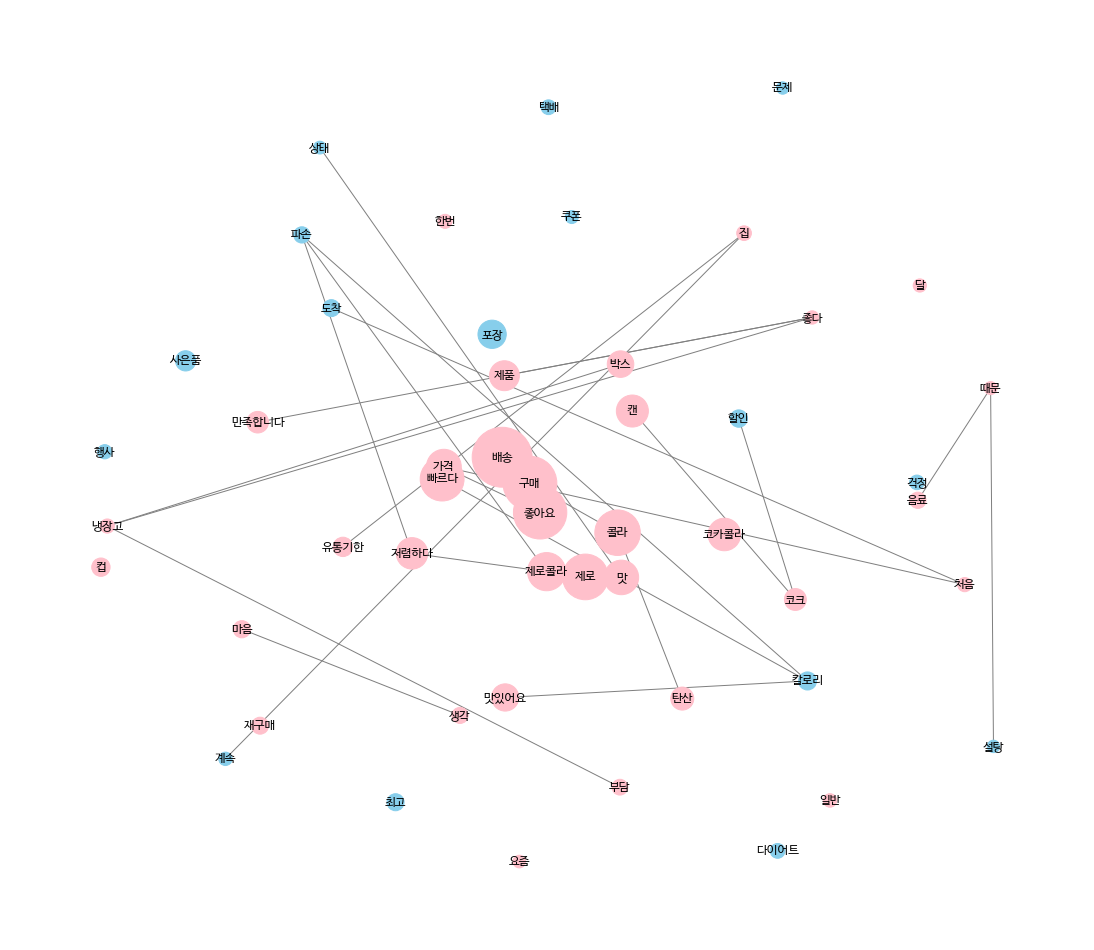

In [58]:
# 한 방 코드


# HS's xlsx

# Victoria
# Minemine  
# Trevi 
# Reinwasser 
# Seagram 

# HS_lst = ['Victoria' , 'Minemine' ,'Trevi' , 'Reinwasser' , 'Seagram']

# ------------------------------------------------------------

# GP's xlsx

# PepsiColaZ 
# NarangdCider 
# NobrandSparkling 
# ChilsungCiderZ 
# WelchsZ 

# GP_lst = ['PepsiColaZ' , 'NarangdCider' , 'NobrandSparkling' , 'ChilsungCiderZ' , 'WelchsZ']

# ------------------------------------------------------------

# JH's xlsx

# CocacolaZ 
# BurrZcider 
# SpriteZ 
# BurrZcola 
# OneamSparkling 

# JH_lst = ['CocacolaZ' , 'BurrZcider' , 'SpriteZ' , 'BurrZcola' , 'OneamSparkling']

# ------------------------------------------------------------

df = CocacolaZ.copy()
df.info()

for i in range(0, 10):
  print(str(i), df['review'][i])


# 문자 정돈

import re

def cleaned_text(text): 
  hangul = re.compile('[^가-힇a-zA-Z0-9]')
  result = hangul.sub(' ', text)

  # 띄어쓰기 명사 추가

  # pepsi_01 = re.compile('제로 펩시')
  # result = pepsi_01.sub('펩시제로', text)

  # pepsi_02 = re.compile('펩시 제로')
  # result = pepsi_02.sub('펩시제로', text)

  return result

df['review'] = df['review'].apply(lambda x: cleaned_text(x))
reviews = df['review']

# NN_words

from konlpy.tag import Okt
okt = Okt()

NN_words = []

for review in reviews:
  okt_pos = okt.pos(review , norm = True)

  for word, pos in okt_pos:
    if 'Noun' in pos :
      NN_words.append(word)
    elif 'Adjective' in pos :
      NN_words.append(word)

# 출력
# NN_words

# 불용어 사전

def bullword_cleaned_text(text): 
  hangul = re.compile('[^가-힇a-zA-Z0-9]')
  result = hangul.sub('', text)
  return result

with open('/content/drive/MyDrive/crawling_data/one_word.txt' , 'r' , encoding='utf-8') as f :
  file_data = f.readlines()

one_word = []
for fi in file_data : 
  one_word.append(bullword_cleaned_text(fi))

customized_stopwords = one_word

unique_NN_words = set(NN_words)

for word in unique_NN_words :
  if word in customized_stopwords:
    while word in NN_words: 
      NN_words.remove(word)

# 출력
# NN_words

# 빈도 파악

from collections import Counter

c = Counter(NN_words)
print(c.most_common(50))

list_of_words = []

for word, count in c.most_common(50):
  list_of_words.append(word)

# 노드 생성

import networkx as nx

G = nx.Graph()
G.add_nodes_from(list_of_words)

# print(G.nodes())
# print(G.edges())

# edge 생성

import itertools
# weight 초기화가 없을 경우 재실행시 계속해서 weight 크기가 커진다.
weight = 0
for review in reviews :

  selected_words = []
  NN_words = []
  # norm = True 정규화 수정
  okt_pos = okt.pos(review , norm = True)

  for word, pos in okt_pos :
    if 'Noun' in pos: # 명사만 가져옴
      NN_words.append(word)
    elif 'Adjective' in pos :
      NN_words.append(word)

  for word in NN_words :
    if word in list_of_words:
      selected_words.append(word)

  selected_words = set(selected_words)

  for pair in list(itertools.combinations(list(selected_words), 2)):
    if pair in G.edges():
      weight = G[pair[0]][pair[1]]['weight']
      weight += 1
      G[pair[0]][pair[1]]['weight'] = weight    
    else:         
      G.add_edge(pair[0], pair[1], weight=1 )
            
 # 생성된 edge 확인해보기
print(nx.get_edge_attributes(G, 'weight'))

# dataframe of nodes
import numpy as np

# def nodes_to_df() :
#   main_data = nx.get_edge_attributes(G, 'weight')
#   words = G.nodes()

#   ary = np.zeros((len(words),len(words)))
#   df_ary = pd.DataFrame(ary)
#   df_ary = df_ary.astype(int)
#   df_ary

#   word_dict = {t:i for i ,t in enumerate(words)}

#   for pr in main_data.keys() :
#       for x in word_dict.keys() :
#           for y in word_dict.keys() :
#               if pr[0] == x and pr[1] == y :
#                   df_ary[word_dict[y]][word_dict[x]] = main_data[(x , y)]

#   df_ary.columns = words
#   df_ary.index = words
#   df_ary.style.background_gradient(cmap ='coolwarm')

#   return df_ary 


  # 노드 빈도 수 df

lst_tr = []
lst_td = []
for tr , td in c.most_common(50) :
  lst_tr.append(tr)
  lst_td.append(td)

text_cnt_df = pd.DataFrame(index = lst_tr  , data=lst_td , columns=['cnt'])
# text_cnt_df

# 각 리스트의 인덱스값은 G.degree()의 인덱스값과 같습니다.
# 참고 : pd.DataFrame(G.degree())

# 노드에 연결된 선의 수가 49개 이상이면/이하이면 구슬의 색상이 아래와 같다.
color_map = []
for node in G:
    if G.degree(node) >= 49:
        color_map.append('pink') 
    else: 
        color_map.append('skyblue')   

# 노드에 연결된 선의 수가 49개 이상이면/이하이면 선의 색상이 아래와 같다.
color_edge = []
for node in G:
    if G.degree(node) >= 49:   
        color_edge.append('grey') 
    else: 
        color_edge.append('blue')   

# 노드에 연결된 선의 수가 49개 이상이면/이하이면 선의 굵기가 아래와 같다.        
color_width = []
for te in range(50):
  if te == 1:
    color_width.append(1)
  else :
    color_width.append(0)


# 특정 기준에 따라 노드 수 세어보기
# color_edge.count('grey')
# color_map.count('pink')

# 텍스트 네트워크 시각화

import networkx as nx
import matplotlib.pyplot as plt

data = nodes_to_df()

plt.rc('font', family='NanumBarunGothic')
G = nx.from_pandas_adjacency(data)
plt.figure(figsize=(15,13))
# 노드 크기 : text_cnt_df.cnt.tolist()
nx.spring_layout(G)
nx.kamada_kawai_layout(G)
nx.shell_layout(G)
nx.circular_layout(G)
nx.fruchterman_reingold_layout(G)
nx.draw(G, with_labels = True , node_color=color_map , font_family='NanumBarunGothic' 
        , node_size = (text_cnt_df.cnt*1).tolist() , edge_color = color_edge , width = color_width) 